In [ ]:
from lib.constants import *
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
from matplotlib.pyplot import savefig
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sb
from queerbenchScore import QueerBenchScore
from lib.utils import getCSVFile  

FONT_SIZE_BIG = 14
FONT_SIZE = 11
NCOL = 2

○ Importing QueerBench score from .JSON file...


ValueError: setting an array element with a sequence.

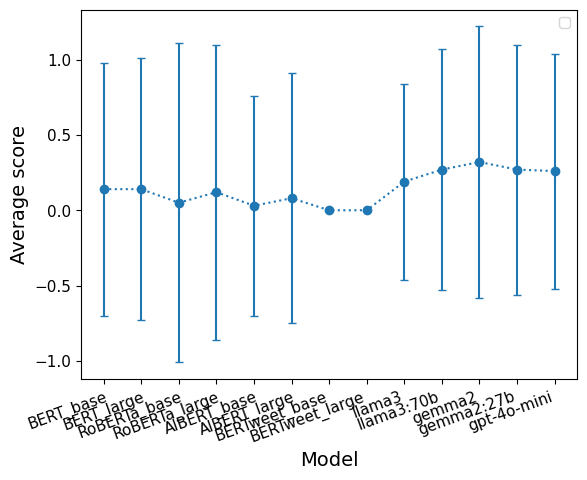

In [10]:
def drawGraph(score_collection, modelList):
    fig, ax = plt.subplots()
    plt.ylabel("Average score", fontsize=FONT_SIZE_BIG)
    plt.xlabel("Model", fontsize=FONT_SIZE_BIG)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
    labelRotation = 30 if len(modelList) > 8 else 20
    plt.xticks(rotation=labelRotation, rotation_mode="anchor", fontsize = FONT_SIZE)
    plt.yticks(fontsize = FONT_SIZE)
    x = []
    graph_collection = defaultdict(lambda: defaultdict(list))
    for modelName in MODEL_LIST:
        x.append(modelName)
        for cat in NOUN_TYPES:
            for score in [AVERAGE, STDEV, AFINN]:
                tmp = score_collection[modelName][AFINN][cat][score]
                #print(tmp)
                graph_collection[cat][score].append(float(score_collection[modelName][AFINN][cat][score]))
    
    
    df = pd.DataFrame(columns=models, index = NOUN_TYPES)
    ax.legend(NOUN_TYPES, ncol = NCOL)
    for idx, cat in enumerate(NOUN_TYPES):
        ax.errorbar(x, graph_collection[cat][AVERAGE], yerr=graph_collection[cat][STDEV], linestyle = ':', capsize=3, marker="o", transform=Affine2D().translate(float(f"0.{idx}"), 0.0) + ax.transData)
        df.loc[cat] = graph_collection[cat][AFINN] 
    
    display(df)
    plt.grid(linestyle = '--', linewidth = 0.5)
    plt.tight_layout()
    os.makedirs(OUTPUT_GRAPHS, exist_ok=True)
    # if models == MODEL_LIST:
    #     plt.savefig(OUTPUT_GRAPHS+ 'afinn_all.png', transparent=True)
    # else: 
    #     plt.savefig(OUTPUT_GRAPHS+type+'/afinn_'+ (models[0].replace("base[1]", "")) +'.png', transparent=True)
    plt.show()
        

predictionsConsidered = 1
inputFolder = OUTPUT_EVALUATION
models = [BERT_BASE]
score_collection = QueerBenchScore(inputFolder, models, predictionsConsidered)
drawGraph(score_collection, models)